In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [41]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)
    """
    import numpy as np
    from matplotlib import pyplot as plt

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    X_diffs = np.asarray([i - X_bar for i in X])
    Y_diffs = np.asarray([i - Y_bar for i in Y])

    num = X_diffs.dot(Y_diffs)

    denom = np.sqrt((X_diffs**2).sum() * (Y_diffs**2).sum())

    r_pearson = num / denom

    beta_1 = r_pearson * Y_diffs.std() / X_diffs.std()

    beta_0 = Y_bar - beta_1 * X_bar

    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0

    fig, ax = plt.subplots()
    ax.plot(X, Y, "ro", label="datapoints")
    ax.plot(Xs, Ys, "k", label=f"y={round(beta_1, 2)}x+{round(beta_0, 2)}")
    plt.legend()
    plt.show()

In [40]:
np.random.seed(0)

num_samples = 100
age = np.random.normal(loc=40, scale=10, size=num_samples).round(0)
cigarettes_per_day = np.random.poisson(lam=10, size=num_samples)

smoking_data = pd.DataFrame( {"Age": age, "CigarettesPerDay": cigarettes_per_day} )
# smoking_data.to_csv("smoking_data.csv", index=False)

smoking_data.head()

,Age,CigarettesPerDay
0,58.0,9
1,44.0,12
2,50.0,11
3,62.0,6
4,59.0,11


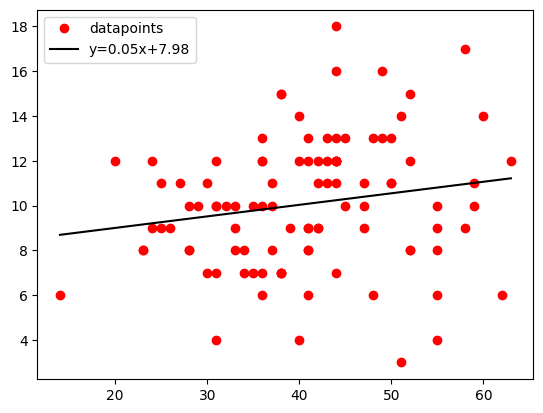

In [42]:
best_line(smoking_data["Age"], smoking_data["CigarettesPerDay"])

Sure, let's walk through how Ordinary Least Squares (OLS) regression works mathematically using the provided data:

```python
ages = np.array([20, 25, 30, 35, 40])
cigarettes_per_day = np.array([10, 15, 20, 25, 30])
```

1. **Define the model**: In simple linear regression, the model is represented as:

   $[ Y = \beta_0 + \beta_1 X + \epsilon ]$

   Where:
   - $ ( Y )$ is the dependent variable (cigarettes per day),
   - $ ( X )$ is the independent variable (ages),
   - $ ( \beta_0 )$ is the y-intercept (constant term),
   - $ ( \beta_1 )$ is the slope (coefficient of the independent variable),
   - $ ( \epsilon )$ is the error term.

2. **Calculate the mean of X and Y**:
   $[ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i ]$
    
   $[ \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i ]$

   For our data:
   
   $[ \bar{X} = \frac{20 + 25 + 30 + 35 + 40}{5} = 30 ]$
   
   $[ \bar{Y} = \frac{10 + 15 + 20 + 25 + 30}{5} = 20 ]$

3. **Calculate the slope (β1)**:

   $[ \beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} ]$

   Substituting the values:

   $[ \beta_1 = \frac{(20-30)(10-20) + (25-30)(15-20) + (30-30)(20-20) + (35-30)(25-20) + (40-30)(30-20)}{(20-30)^2 + (25-30)^2 + (30-30)^2 + (35-30)^2 + (40-30)^2} ]$

   Simplifying, we get:

   $[ \beta_1 = \frac{-100 + (-5)(-5) + 0 + 5(5) + 100}{100 + 25 + 0 + 25 + 100} = \frac{50}{125} = 0.4 ]$

4. **Calculate the y-intercept (β0)**:

   $[ \beta_0 = \bar{Y} - \beta_1 \bar{X} ]$

   Substituting the values:
   
   $[ \beta_0 = 20 - 0.4 \times 30 = 20 - 12 = 8 ]$

5. **Fit the regression line**:
   Now we have the estimated values of \( \beta_0 \) and \( \beta_1 \), so the regression line equation is:
   $[ \text{Cigarettes per day} = 0.4 \times \text{Age} + 8 ]$

   This line represents the best linear fit to the given data points.